# Working method

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [ ]:
!pip install --upgrade tensorflow-gpu==2.2.0 --user
!pip uninstall tensorflow-datasets
!pip install tensorflow-datasets==4.0.0

     |████████████████████████████████| 516.2MB 33kB/s 
     |████████████████████████████████| 3.0MB 32.1MB/s 
     |████████████████████████████████| 460kB 57.6MB/s 
     |████████████████████████████████| 2.9MB 35.1MB/s 
ERROR: tensorflow 2.5.0 has requirement gast==0.4.0, but you'll have gast 0.3.3 which is incompatible.
ERROR: tensorflow 2.5.0 has requirement h5py~=3.1.0, but you'll have h5py 2.10.0 which is incompatible.
ERROR: tensorflow 2.5.0 has requirement tensorboard~=2.5, but you'll have tensorboard 2.2.2 which is incompatible.
ERROR: tensorflow 2.5.0 has requirement tensorflow-estimator<2.6.0,>=2.5.0rc0, but you'll have tensorflow-estimator 2.2.0 which is incompatible.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
Uninstalling tensorflow-datasets-4.0.1:
  Would remove:
    /usr/local/bin/tf

In [ ]:
!pip install --upgrade tensorflow
!pip install --upgrade tensorflow-gpu

Requirement already up-to-date: tensorflow in /usr/local/lib/python3.7/dist-packages (2.5.0)
     |████████████████████████████████| 471kB 25.4MB/s 
     |████████████████████████████████| 4.0MB 45.0MB/s 
     |████████████████████████████████| 6.0MB 47.6MB/s 
ERROR: tensorflow-gpu 2.2.0 has requirement gast==0.3.3, but you'll have gast 0.4.0 which is incompatible.
ERROR: tensorflow-gpu 2.2.0 has requirement h5py<2.11.0,>=2.10.0, but you'll have h5py 3.1.0 which is incompatible.
ERROR: tensorflow-gpu 2.2.0 has requirement tensorboard<2.3.0,>=2.2.0, but you'll have tensorboard 2.5.0 which is incompatible.
ERROR: tensorflow-gpu 2.2.0 has requirement tensorflow-estimator<2.3.0,>=2.2.0, but you'll have tensorflow-estimator 2.5.0 which is incompatible.
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3
  Found existing installation: tensorflow-estimator 2.2.0
    Uninstalling tensorflow-estimator-2.2.0:
      Successfully uninsta

In [ ]:
import os, sys, numpy as np, pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
#keras
from keras.models import Model
from keras import initializers, regularizers, constraints, optimizers, layers

In [ ]:
train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/btp2/train.tsv", sep='\t' , names=['text', 'labels', 'id'])
dev = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/btp2/dev.tsv", sep='\t' , names=['text', 'labels', 'id'])
train = pd.concat([train, dev], ignore_index=True)
train

,text,labels,id
0,My favourite food is anything I didn't have to...,27,eebbqej
1,"Now if he does off himself, everyone will thin...",27,ed00q6i
2,WHY THE FUCK IS BAYLESS ISOING,2,eezlygj
3,To make her feel threatened,14,ed7ypvh
4,Dirty Southern Wankers,3,ed0bdzj
...,...,...,...
48831,It's pretty dangerous when the state decides w...,14,edyrazk
48832,I filed for divorce this morning. Hoping he mo...,20,edi2z3y
48833,"The last time it happened I just said, ""No"" an...",10,eewbqtx
48834,I can’t stand this arrogant prick he’s no bett...,3,eefx57m


In [ ]:
test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/btp2/test.tsv", sep='\t', names=['text', 'labels', 'id'])
test

,text,labels,id
0,I’m really sorry about your situation :( Altho...,25,eecwqtt
1,It's wonderful because it's awful. At not with.,0,ed5f85d
2,"Kings fan here, good luck to you guys! Will be...",13,een27c3
3,"I didn't know that, thank you for teaching me ...",15,eelgwd1
4,They got bored from haunting earth for thousan...,27,eem5uti
...,...,...,...
5422,Thanks. I was diagnosed with BP 1 after the ho...,15,efeeasc
5423,Well that makes sense.,4,ef9c7s3
5424,Daddy issues [NAME],27,efbiugo
5425,So glad I discovered that subreddit a couple m...,0,efbvgp9


In [ ]:
emotion_to_polarity = {
    0: 4,
    1: 4,
    2: 0,
    3: 0,
    4: 4,
    5: 4, 
    6: 6,
    7: 6,
    8: 4,
    9: 3,
    10: 0,
    11: 1,
    12: 3,
    13: 4, 
    14: 2,
    15: 4,
    16: 3,
    17: 4,
    18: 4,
    19: 2,
    20: 4,
    21: 4,
    22: 6, 
    23: 4, 
    24: 3,
    25: 3,
    26: 6,
    27: 5

}

In [ ]:
match_int_to_label = {
    0: "anger",
    1: "disgust",
    2: "fear", 
    3: "sadness",
    4: "joy",
    5: "neutral",
    6: "surprise"
}


In [ ]:
anger = [0]*len(train['text'])
disgust = [0]*len(train['text'])
fear = [0]*len(train['text'])
sadness = [0]*len(train['text'])
joy = [0]*len(train['text'])
neutral = [0]*len(train['text'])
surprise = [0]*len(train['text'])

match_string_to_list = {
    "anger": anger,
    "disgust": disgust,
    "fear": fear, 
    "sadness": sadness,
    "joy": joy,
    "neutral": neutral,
    "surprise": surprise
}

for index, label in enumerate(train['labels']):

  labels = label.split(',')
  for i in labels:
    emotion_no = emotion_to_polarity[int(i)]
    emotion_name = match_int_to_label[emotion_no]
    
    for key in match_string_to_list:
      if key == emotion_name:
        match_string_to_list[key][index]  = 1
        #print(emotion_name, index)


In [ ]:
for key in match_string_to_list:
    train[key] = match_string_to_list[key] 


In [ ]:
train.head()

,text,labels,id,anger,disgust,fear,sadness,joy,neutral,surprise
0,My favourite food is anything I didn't have to...,27,eebbqej,0,0,0,0,0,1,0
1,"Now if he does off himself, everyone will thin...",27,ed00q6i,0,0,0,0,0,1,0
2,WHY THE FUCK IS BAYLESS ISOING,2,eezlygj,1,0,0,0,0,0,0
3,To make her feel threatened,14,ed7ypvh,0,0,1,0,0,0,0
4,Dirty Southern Wankers,3,ed0bdzj,1,0,0,0,0,0,0


In [ ]:
anger = [0]*len(test['text'])
disgust = [0]*len(test['text'])
fear = [0]*len(test['text'])
sadness = [0]*len(test['text'])
joy = [0]*len(test['text'])
neutral = [0]*len(test['text'])
surprise = [0]*len(test['text'])

match_string_to_list = {
    "anger": anger,
    "disgust": disgust,
    "fear": fear, 
    "sadness": sadness,
    "joy": joy,
    "neutral": neutral,
    "surprise": surprise
}

for index, label in enumerate(test['labels']):

  labels = label.split(',')
  for i in labels:
    emotion_no = emotion_to_polarity[int(i)]
    emotion_name = match_int_to_label[emotion_no]
    
    for key in match_string_to_list:
      if key == emotion_name:
        match_string_to_list[key][index]  = 1
        print(emotion_name, index)


for key in match_string_to_list:
    test[key] = match_string_to_list[key] 


Streaming output truncated to the last 5000 lines.
joy 1143
joy 1144
joy 1145
joy 1146
neutral 1147
surprise 1148
neutral 1149
joy 1150
joy 1151
joy 1151
sadness 1152
joy 1153
surprise 1154
neutral 1155
neutral 1156
neutral 1157
joy 1158
neutral 1159
joy 1160
neutral 1161
joy 1162
joy 1162
joy 1163
neutral 1164
neutral 1165
neutral 1166
surprise 1167
joy 1168
joy 1169
sadness 1170
disgust 1171
neutral 1172
neutral 1173
joy 1174
joy 1175
joy 1176
surprise 1177
neutral 1177
surprise 1178
neutral 1179
anger 1180
joy 1181
anger 1182
neutral 1183
joy 1184
joy 1185
joy 1186
anger 1187
anger 1187
sadness 1187
sadness 1188
joy 1189
neutral 1189
joy 1190
surprise 1191
neutral 1191
neutral 1192
neutral 1193
joy 1194
neutral 1194
anger 1195
neutral 1196
anger 1197
joy 1198
sadness 1198
joy 1199
joy 1200
joy 1201
joy 1202
surprise 1203
joy 1204
neutral 1204
joy 1205
surprise 1206
neutral 1207
neutral 1208
joy 1209
neutral 1209
surprise 1210
neutral 1211
anger 1212
surprise 1213
neutral 1214
neutra

In [ ]:
#Data Seperation
train_comments = train["text"]
test_comments = test["text"]
classes = ["anger", "disgust","fear", "sadness", "joy", "neutral", "surprise"]
y = train[classes].values

In [ ]:
#Tokenization
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words = 20000, lower=True)
tokenizer.fit_on_texts(list(train_comments))
tokenized_train_comments = tokenizer.texts_to_sequences(train_comments)
tokenized_test_comments = tokenizer.texts_to_sequences(test_comments)

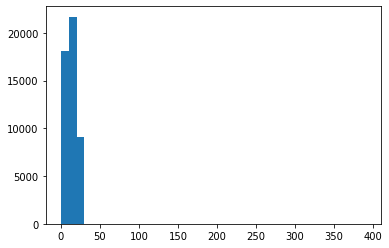

In [ ]:
comments_len = [len(comment) for comment in tokenized_train_comments]
plt.hist(comments_len, bins=np.arange(0,400,10))
plt.show()

In [ ]:
#Seqeunce Padding
from keras.preprocessing.sequence import pad_sequences
X_train = pad_sequences(tokenized_train_comments, maxlen=33)
X_test = pad_sequences(tokenized_test_comments, maxlen=33)

In [ ]:
#Create model
from keras.layers import Input, Dense, LSTM, Embedding, Dropout,GlobalMaxPooling1D
from keras.models import Model

inputLayer = Input(shape=33)
embedLayer = Embedding(input_dim=20000, output_dim=128)(inputLayer)
lstmLayer = LSTM(units=60, return_sequences=True)(embedLayer)
maxPool = GlobalMaxPooling1D()(lstmLayer)
dropOut1 = Dropout(0.1)(maxPool)
fcLayer1 = Dense(units=50, activation='relu')(dropOut1)
dropOut2 = Dropout(0.1)(fcLayer1)
fcLayer2 = Dense(units=7, activation='sigmoid')(dropOut2)

model = Model(inputs=inputLayer, outputs=fcLayer2)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(X_train, y, batch_size=32, epochs=3, validation_split=0.1)

Epoch 1/3
1374/1374 [==============================] - 69s 39ms/step - loss: 0.3595 - accuracy: 0.4191 - val_loss: 0.2670 - val_accuracy: 0.6026
Epoch 2/3
1374/1374 [==============================] - 53s 39ms/step - loss: 0.2547 - accuracy: 0.6331 - val_loss: 0.2484 - val_accuracy: 0.6286
Epoch 3/3
1374/1374 [==============================] - 53s 39ms/step - loss: 0.2192 - accuracy: 0.6897 - val_loss: 0.2522 - val_accuracy: 0.6140


In [ ]:
y_test = test[classes].values

In [ ]:
model.evaluate(X_test, y_test)

170/170 [==============================] - 1s 6ms/step - loss: 0.2515 - accuracy: 0.6265


[0.251505583524704, 0.6264971494674683]

In [ ]:
import pickle

# saving
with open('/content/drive/MyDrive/Colab Notebooks/btp2/tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/btp2/model')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/btp2/model/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/btp2/model/assets


In [ ]:
# loading
with open('/content/drive/MyDrive/Colab Notebooks/btp2/tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

In [ ]:
y_predicted = model.predict(X_test)

In [ ]:
anger = 0
disgust = 0
fear = 0
sadness = 0
joy = 0
neutral = 0
surprise = 0
for pred in y_predicted:
  anger += pred[0]
  disgust += pred[1]
  fear += pred[2]
  sadness += pred[3]
  joy += pred[4]
  neutral += pred[5]
  surprise += pred[6]

In [ ]:
print(anger, disgust, fear, sadness, joy, neutral, surprise)

636.855584859848 77.80634279420883 73.68957938756648 398.137818723917 2001.7524175047874 2085.5875538289547 527.2347195446491


## Working method 2


In [ ]:
import os, sys, numpy as np, pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
#keras
from keras.models import Model
from keras import initializers, regularizers, constraints, optimizers, layers

In [ ]:
train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/btp2/train_combined.csv")
train = train.loc[:, ~train.columns.str.contains('^Unnamed')]
train.head()

,text,labels
0,My favourite food is anything I didn't have to...,"[0, 0, 0, 0, 0, 1, 0]"
1,"Now if he does off himself, everyone will thin...","[0, 0, 0, 0, 0, 1, 0]"
2,WHY THE FUCK IS BAYLESS ISOING,"[1, 0, 0, 0, 0, 0, 0]"
3,To make her feel threatened,"[0, 0, 1, 0, 0, 0, 0]"
4,Dirty Southern Wankers,"[1, 0, 0, 0, 0, 0, 0]"


In [ ]:
test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/btp2/test_combined.csv")
test = test.loc[:, ~test.columns.str.contains('^Unnamed')]
test.head()

,text,labels
0,I’m really sorry about your situation :( Altho...,"[0, 0, 0, 1, 0, 0, 0]"
1,It's wonderful because it's awful. At not with.,"[0, 0, 0, 0, 1, 0, 0]"
2,"Kings fan here, good luck to you guys! Will be...","[0, 0, 0, 0, 1, 0, 0]"
3,"I didn't know that, thank you for teaching me ...","[0, 0, 0, 0, 1, 0, 0]"
4,They got bored from haunting earth for thousan...,"[0, 0, 0, 0, 0, 1, 0]"


In [ ]:
anger = []
disgust = []
fear = []
sadness = []
joy = []
neutral = []
surprise = []



for label in train['labels']:
  str_emo = label[1:-1]
  arr_emo = str_emo.split(',')
  arr_emo = [int(i) for i in arr_emo]

  anger.append(arr_emo[0])
  disgust.append(arr_emo[1])
  fear.append(arr_emo[2])
  sadness.append(arr_emo[3])
  joy.append(arr_emo[4])
  neutral.append(arr_emo[5])
  surprise.append(arr_emo[6])



match_string_to_list = {
    "anger": anger,
    "disgust": disgust,
    "fear": fear, 
    "sadness": sadness,
    "joy": joy,
    "neutral": neutral,
    "surprise": surprise
}

for key in match_string_to_list:
    train[key] = match_string_to_list[key] 

train.head()

54876
54876


,text,labels,anger,disgust,fear,sadness,joy,neutral,surprise
0,My favourite food is anything I didn't have to...,"[0, 0, 0, 0, 0, 1, 0]",0,0,0,0,0,1,0
1,"Now if he does off himself, everyone will thin...","[0, 0, 0, 0, 0, 1, 0]",0,0,0,0,0,1,0
2,WHY THE FUCK IS BAYLESS ISOING,"[1, 0, 0, 0, 0, 0, 0]",1,0,0,0,0,0,0
3,To make her feel threatened,"[0, 0, 1, 0, 0, 0, 0]",0,0,1,0,0,0,0
4,Dirty Southern Wankers,"[1, 0, 0, 0, 0, 0, 0]",1,0,0,0,0,0,0


In [ ]:
anger = []
disgust = []
fear = []
sadness = []
joy = []
neutral = []
surprise = []



for label in test['labels']:
  str_emo = label[1:-1]
  arr_emo = str_emo.split(',')
  arr_emo = [int(i) for i in arr_emo]

  anger.append(arr_emo[0])
  disgust.append(arr_emo[1])
  fear.append(arr_emo[2])
  sadness.append(arr_emo[3])
  joy.append(arr_emo[4])
  neutral.append(arr_emo[5])
  surprise.append(arr_emo[6])



match_string_to_list = {
    "anger": anger,
    "disgust": disgust,
    "fear": fear, 
    "sadness": sadness,
    "joy": joy,
    "neutral": neutral,
    "surprise": surprise
}

for key in match_string_to_list:
    test[key] = match_string_to_list[key] 

test.head()

,text,labels,anger,disgust,fear,sadness,joy,neutral,surprise
0,I’m really sorry about your situation :( Altho...,"[0, 0, 0, 1, 0, 0, 0]",0,0,0,1,0,0,0
1,It's wonderful because it's awful. At not with.,"[0, 0, 0, 0, 1, 0, 0]",0,0,0,0,1,0,0
2,"Kings fan here, good luck to you guys! Will be...","[0, 0, 0, 0, 1, 0, 0]",0,0,0,0,1,0,0
3,"I didn't know that, thank you for teaching me ...","[0, 0, 0, 0, 1, 0, 0]",0,0,0,0,1,0,0
4,They got bored from haunting earth for thousan...,"[0, 0, 0, 0, 0, 1, 0]",0,0,0,0,0,1,0


In [ ]:
#Data Seperation
train_comments = train["text"]
test_comments = test["text"]
classes = ["anger", "disgust","fear", "sadness", "joy", "neutral", "surprise"]
y = train[classes].values

In [ ]:
#Tokenization
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words = 20000)
tokenizer.fit_on_texts(list(train_comments))
tokenized_train_comments = tokenizer.texts_to_sequences(train_comments)
tokenized_test_comments = tokenizer.texts_to_sequences(test_comments)

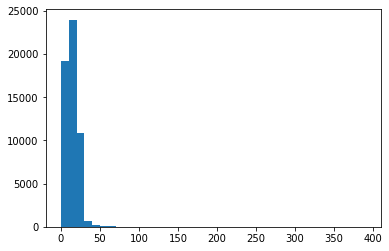

In [ ]:
comments_len = [len(comment) for comment in tokenized_train_comments]
plt.hist(comments_len, bins=np.arange(0,400,10))
plt.show()

In [ ]:
#Seqeunce Padding
from keras.preprocessing.sequence import pad_sequences
X_train = pad_sequences(tokenized_train_comments, maxlen=40)
X_test = pad_sequences(tokenized_test_comments, maxlen=40)

In [ ]:
#Create model
from keras.layers import Input, Dense, LSTM, Embedding, Dropout,GlobalMaxPooling1D
from keras.models import Model

inputLayer = Input(shape=40)
embedLayer = Embedding(input_dim=20000, output_dim=128)(inputLayer)
lstmLayer = LSTM(units=60, return_sequences=True)(embedLayer)
maxPool = GlobalMaxPooling1D()(lstmLayer)
dropOut1 = Dropout(0.1)(maxPool)
fcLayer1 = Dense(units=50, activation='relu')(dropOut1)
dropOut2 = Dropout(0.1)(fcLayer1)
fcLayer2 = Dense(units=7, activation='sigmoid')(dropOut2)

model = Model(inputs=inputLayer, outputs=fcLayer2)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(X_train, y, batch_size=32, epochs=3, validation_split=0.2)

Epoch 1/3
1372/1372 [==============================] - 38s 28ms/step - loss: 0.0741 - accuracy: 0.8934 - val_loss: 0.7568 - val_accuracy: 0.5292
Epoch 2/3
1372/1372 [==============================] - 38s 27ms/step - loss: 0.0679 - accuracy: 0.9004 - val_loss: 0.7724 - val_accuracy: 0.5308
Epoch 3/3
1372/1372 [==============================] - 38s 27ms/step - loss: 0.0621 - accuracy: 0.9070 - val_loss: 0.8170 - val_accuracy: 0.5138


In [ ]:
y_test = test[classes].values

In [ ]:
model.evaluate(X_test, y_test)

201/201 [==============================] - 1s 3ms/step - loss: 0.7051 - accuracy: 0.5173


[0.705104410648346, 0.5172575116157532]

In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/btp2/saved_model2.pb')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/btp2/saved_model2.pb/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/btp2/saved_model2.pb/assets


# Method 3 - Bert

In [ ]:
! pip install pytorch_pretrained_bert pytorch-nlp -q


     |████████████████████████████████| 133kB 2.9MB/s 
     |████████████████████████████████| 92kB 7.4MB/s 
     |████████████████████████████████| 133kB 16.1MB/s 
     |████████████████████████████████| 7.6MB 22.2MB/s 
     |████████████████████████████████| 81kB 8.2MB/s 
ERROR: botocore 1.20.85 has requirement urllib3<1.27,>=1.25.4, but you'll have urllib3 1.24.3 which is incompatible.


In [ ]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from bs4 import BeautifulSoup
import re

from pytorch_pretrained_bert import BertTokenizer, BertForSequenceClassification, BertAdam
import torch
from torch.utils.data import TensorDataset, RandomSampler, SequentialSampler, DataLoader
from torch.nn import BCEWithLogitsLoss, Sigmoid

from tqdm.notebook import tqdm, trange

from keras.preprocessing.sequence import pad_sequences

from sklearn.model_selection import train_test_split

#
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [ ]:
train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/btp2/train.tsv", sep='\t', names=['text', 'labels', 'id'])

test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/btp2/test.tsv", sep='\t', names=['text', 'labels', 'id'])

train.head()

,text,labels,id
0,My favourite food is anything I didn't have to...,27,eebbqej
1,"Now if he does off himself, everyone will thin...",27,ed00q6i
2,WHY THE FUCK IS BAYLESS ISOING,2,eezlygj
3,To make her feel threatened,14,ed7ypvh
4,Dirty Southern Wankers,3,ed0bdzj


In [ ]:
emotion_to_polarity = {
    0: 4,
    1: 4,
    2: 0,
    3: 0,
    4: 4,
    5: 4, 
    6: 6,
    7: 6,
    8: 4,
    9: 3,
    10: 0,
    11: 1,
    12: 3,
    13: 4, 
    14: 2,
    15: 4,
    16: 3,
    17: 4,
    18: 4,
    19: 2,
    20: 4,
    21: 4,
    22: 6, 
    23: 4, 
    24: 3,
    25: 3,
    26: 6,
    27: 5

}

In [ ]:
match_int_to_label = {
    0: "anger",
    1: "disgust",
    2: "fear", 
    3: "sadness",
    4: "joy",
    5: "neutral",
    6: "surprise"
}

In [ ]:
anger = [0]*len(train['text'])
disgust = [0]*len(train['text'])
fear = [0]*len(train['text'])
sadness = [0]*len(train['text'])
joy = [0]*len(train['text'])
neutral = [0]*len(train['text'])
surprise = [0]*len(train['text'])

match_string_to_list = {
    "anger": anger,
    "disgust": disgust,
    "fear": fear, 
    "sadness": sadness,
    "joy": joy,
    "neutral": neutral,
    "surprise": surprise
}

for index, label in enumerate(train['labels']):

  labels = label.split(',')
  for i in labels:
    emotion_no = emotion_to_polarity[int(i)]
    emotion_name = match_int_to_label[emotion_no]
    
    for key in match_string_to_list:
      if key == emotion_name:
        match_string_to_list[key][index]  = 1
        #print(emotion_name, index)


In [ ]:
for key in match_string_to_list:
    train[key] = match_string_to_list[key] 


In [ ]:
train.head()

,text,labels,id,anger,disgust,fear,sadness,joy,neutral,surprise
0,My favourite food is anything I didn't have to...,27,eebbqej,0,0,0,0,0,1,0
1,"Now if he does off himself, everyone will thin...",27,ed00q6i,0,0,0,0,0,1,0
2,WHY THE FUCK IS BAYLESS ISOING,2,eezlygj,1,0,0,0,0,0,0
3,To make her feel threatened,14,ed7ypvh,0,0,1,0,0,0,0
4,Dirty Southern Wankers,3,ed0bdzj,1,0,0,0,0,0,0


In [ ]:
anger = [0]*len(test['text'])
disgust = [0]*len(test['text'])
fear = [0]*len(test['text'])
sadness = [0]*len(test['text'])
joy = [0]*len(test['text'])
neutral = [0]*len(test['text'])
surprise = [0]*len(test['text'])

match_string_to_list = {
    "anger": anger,
    "disgust": disgust,
    "fear": fear, 
    "sadness": sadness,
    "joy": joy,
    "neutral": neutral,
    "surprise": surprise
}

for index, label in enumerate(test['labels']):

  labels = label.split(',')
  for i in labels:
    emotion_no = emotion_to_polarity[int(i)]
    emotion_name = match_int_to_label[emotion_no]
    
    for key in match_string_to_list:
      if key == emotion_name:
        match_string_to_list[key][index]  = 1
        #print(emotion_name, index)


for key in match_string_to_list:
    test[key] = match_string_to_list[key] 

In [ ]:
for key in match_string_to_list:
    test[key] = match_string_to_list[key] 

In [ ]:
test.head()

,text,labels,id,anger,disgust,fear,sadness,joy,neutral,surprise
0,I’m really sorry about your situation :( Altho...,25,eecwqtt,0,0,0,1,0,0,0
1,It's wonderful because it's awful. At not with.,0,ed5f85d,0,0,0,0,1,0,0
2,"Kings fan here, good luck to you guys! Will be...",13,een27c3,0,0,0,0,1,0,0
3,"I didn't know that, thank you for teaching me ...",15,eelgwd1,0,0,0,0,1,0,0
4,They got bored from haunting earth for thousan...,27,eem5uti,0,0,0,0,0,1,0


In [ ]:
df_train = train
df_test = test

In [ ]:
def strip(text):
    soup = BeautifulSoup(text, 'html.parser')
    text = re.sub('\[[^]]*\]', '', soup.get_text())
    pattern=r"[^a-zA-z0-9\s,']"
    text=re.sub(pattern,'',text)
    return text

df_train["text"] = df_train["text"].apply(strip)
df_test["text"] = df_test["text"].apply(strip)

In [ ]:
train_sentences = df_train["text"]
test_sentences = df_test["text"]
train_sentences = ["[CLS] "+ i + " [SEP]"for i in train_sentences]
test_sentences = ["[CLS] "+ i + " [SEP]"for i in test_sentences]
train_sentences[0], test_sentences[0]

("[CLS] My favourite food is anything I didn't have to cook myself [SEP]",
 '[CLS] Im really sorry about your situation  Although I love the names Sapphira, Cirilla, and Scarlett [SEP]')

In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case = True)

train_tokenizer_texts = list(map(lambda t: tokenizer.tokenize(t)[:510], tqdm(train_sentences)))

test_tokenizer_texts = list(map(lambda t: tokenizer.tokenize(t)[:510], tqdm(test_sentences)))

np.array(train_tokenizer_texts[0]), np.array(test_tokenizer_texts[0])

(array(['[CLS]', 'my', 'favourite', 'food', 'is', 'anything', 'i', 'didn',
        "'", 't', 'have', 'to', 'cook', 'myself', '[SEP]'], dtype='<U9'),
 array(['[CLS]', 'im', 'really', 'sorry', 'about', 'your', 'situation',
        'although', 'i', 'love', 'the', 'names', 'sap', '##phi', '##ra',
        ',', 'ci', '##rill', '##a', ',', 'and', 'scarlett', '[SEP]'],
       dtype='<U9'))

In [ ]:
labels = df_train[["anger", "disgust","fear", "sadness", "joy", "neutral", "surprise"]].to_numpy()

In [ ]:

MAX_LEN = 30

input_ids = [tokenizer.convert_tokens_to_ids(x) for x in tqdm(train_tokenizer_texts)]
input_ids = pad_sequences(sequences = input_ids, maxlen = MAX_LEN, dtype = 'long', padding='post', truncating='post')

test_input_ids = [tokenizer.convert_tokens_to_ids(x) for x in tqdm(test_tokenizer_texts)]
test_input_ids = pad_sequences(sequences = test_input_ids, maxlen = MAX_LEN, dtype = 'long', padding='post', truncating='post')


input_ids[0], test_input_ids[0]

(array([ 101, 2026, 8837, 2833, 2003, 2505, 1045, 2134, 1005, 1056, 2031,
        2000, 5660, 2870,  102,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0]),
 array([  101, 10047,  2428,  3374,  2055,  2115,  3663,  2348,  1045,
         2293,  1996,  3415, 20066, 21850,  2527,  1010, 25022, 24714,
         2050,  1010,  1998, 20862,   102,     0,     0,     0,     0,
            0,     0,     0]))

In [ ]:
#Creating an attention mask - For actual tokens its set to 1, for padding tokens its set to 0
def create_attention_masks(input_ids):
    attention_masks = []
    for seq in tqdm(input_ids):
        seq_mask = [float(i>0) for i in seq]
        attention_masks.append(seq_mask)
    return np.array(attention_masks)

attention_masks = create_attention_masks(input_ids)
test_attention_masks = create_attention_masks(test_input_ids)
attention_masks[0], test_attention_masks[0]

(array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0.]))

In [ ]:
# Use train_test_split to split our data and attention masks into train and validation sets for training
X_train, X_val, y_train, y_val = train_test_split(input_ids, labels, random_state = 123, test_size = 0.20)
attention_masks_train, attention_masks_val = train_test_split(attention_masks, random_state = 123, test_size = 0.20)

In [ ]:
# Convert all inputs and labels into torch tensors, the required datatype 
X_train = torch.tensor(X_train)
X_val = torch.tensor(X_val)
y_train = torch.tensor(y_train) 
y_val = torch.tensor(y_val)
attention_masks_train = torch.tensor(attention_masks_train)
attention_masks_val = torch.tensor(attention_masks_val)

test_input_ids = torch.tensor(test_input_ids)
test_attention_masks = torch.tensor(test_attention_masks)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
y_val.shape


torch.Size([8682, 7])

In [ ]:
BATCH_SIZE = 16
#Dataset wrapping tensors.
train_data = TensorDataset(X_train, attention_masks_train, y_train)
val_data = TensorDataset(X_val, attention_masks_val, y_val)
test_data = TensorDataset(test_input_ids, test_attention_masks)
#Samples elements randomly. If without replacement(default), then sample from a shuffled dataset.
train_sampler = RandomSampler(train_data)
val_sampler = SequentialSampler(val_data)
test_sampler = SequentialSampler(test_data)
#represents a Python iterable over a dataset
train_dataloader = DataLoader(train_data, sampler = train_sampler, batch_size = BATCH_SIZE)
val_dataloader = DataLoader(val_data, sampler = val_sampler, batch_size = BATCH_SIZE)
test_dataloader = DataLoader(test_data, sampler = test_sampler, batch_size = BATCH_SIZE)

In [ ]:
#Inititaing a BERT model
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels = 7)
model.cuda()

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): BertLayerNorm()
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): BertLayerNorm()
              (dropout): Dropout(p=0.1, inplace=False)
   

In [ ]:
#Dividing the params into those which needs to be updated and rest
param_optimizer = list(model.named_parameters())
no_decay = ['bias', 'gamma', 'beta']
optimizer_grouped_parameters = [
    {
        'params': [p for n, p in param_optimizer if not any(nd in n for nd in no_decay)],
        'weight_decay_rate': 0.01
    },
    {
        'params': [p for n, p in param_optimizer if any(nd in n for nd in no_decay)],
        'weight_decay_rate': 0.0
    }
]

optimizer = BertAdam(optimizer_grouped_parameters, lr = 2e-5, warmup = .1)

t_total value of -1 results in schedule not being applied


In [ ]:
#freeing up memory
torch.cuda.empty_cache()
import gc
gc.collect()

1538

In [ ]:
#Empty the GPU memory as it might be memory and CPU intensive while training
torch.cuda.empty_cache()
#Number of times the whole dataset will run through the network and model is fine-tuned
epochs = 4
#Iterate over number of epochs
for _ in trange(epochs, desc = "Epoch"):
    #Switch model to train phase where it will update gradients
    model.train()
    #Initaite train and validation loss, number of rows passed and number of batches passed
    tr_loss = 0
    nb_tr_examples, nb_tr_steps = 0, 0
    val_loss = 0
    nb_val_examples, nb_val_steps = 0, 0
    #Iterate over batches within the same epoch
    for batch in tqdm(train_dataloader):
        #Shift the batch to GPU for computation
        batch = tuple(t.to(device) for t in batch)
        #Load the input ids and masks from the batch
        b_input_ids, b_input_mask, b_labels = batch
        #Initiate gradients to 0 as they tend to add up
        optimizer.zero_grad()
        #Forward pass the input data
        logits = model(b_input_ids, token_type_ids = None, attention_mask = b_input_mask)
        #We will be using the Binary Cross entropy loss with added sigmoid function after that in BCEWithLogitsLoss
        loss_func = BCEWithLogitsLoss()
        #Calculate the loss between multilabel predicted outputs and actuals
        loss = loss_func(logits, b_labels.type_as(logits))
        #Backpropogate the loss and calculate the gradients
        loss.backward()
        #Update the weights with the calculated gradients
        optimizer.step()
        #Add the loss of the batch to the final loss, number of rows and batches
        tr_loss += loss.item()
        nb_tr_examples += b_input_ids.size(0)
        nb_tr_steps += 1
    #Print the current training loss 
    print("Train Loss: {}".format(tr_loss/nb_tr_examples))
    #Switch the model to evaluate stage at which the gradients wont be updated
    model.eval()
    #Iterate over the validation data
    for step, batch in enumerate(val_dataloader):
        #Shift the validation data to GPUs for computation
        batch = tuple(t.to(device) for t in batch)
        #We dont want to update the gradients
        with torch.no_grad():
            #Load the input ids and masks from the batch
            b_input_ids, b_input_mask, b_labels = batch
            #Forward pass the input data
            logits = model(b_input_ids, token_type_ids = None, attention_mask = b_input_mask)
            #We will be using the Binary Cross entropy loss with added sigmoid function after that in BCEWithLogitsLoss
            loss_func = BCEWithLogitsLoss()
            #Calculate the loss between multilabel predicted outputs and actuals
            loss = loss_func(logits, b_labels.type_as(logits))
            #Add the loss of the batch to the final loss, number of rows and batches
            val_loss += loss.item()
            nb_val_examples += b_input_ids.size(0)
            nb_val_steps += 1
    #Print the current validation loss     
    print("Valid Loss: {}".format(val_loss/nb_val_examples))



Train Loss: 0.015103584189552353
Valid Loss: 0.013845395842604417



Train Loss: 0.011809888602086604
Valid Loss: 0.014467932075773536



Train Loss: 0.009049825941419936
Valid Loss: 0.015875322070162408



Train Loss: 0.006202662200570421
Valid Loss: 0.018382147567265597



In [ ]:
PATH = "/content/drive/MyDrive/Colab Notebooks/btp2/bert_entire_model.pt"

# Load
model = torch.load(PATH)
model.eval()

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): BertLayerNorm()
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): BertLayerNorm()
              (dropout): Dropout(p=0.1, inplace=False)
   

In [ ]:
outputs = []

#Iterate over the test_loader 
for step, batch in enumerate(test_dataloader):
        #Transfer batch to GPUs
        batch = tuple(t.to(device) for t in batch)
        #We dont need to update gradients as we are just predicting
        with torch.no_grad():
            #Bring up the next batch of input_texts and attention_masks 
            b_input_ids, b_input_mask = batch
            #Forward propogate the inputs and get output as logits
            logits = model(b_input_ids, token_type_ids = None, attention_mask = b_input_mask)
            #Pass the outputs through a sigmoid function to get the multi-label preditions
            s = Sigmoid()
            out = s(logits).to('cpu').numpy()    
            #Add the predictions for this batch to the final list
            outputs.extend(out)
            
print(outputs)

[array([0.00731651, 0.00346035, 0.0031296 , 0.66367346, 0.9791638 ,
       0.0054465 , 0.00504128], dtype=float32), array([0.11889043, 0.20031597, 0.00864706, 0.0295396 , 0.9823544 ,
       0.00424581, 0.00358834], dtype=float32), array([2.1030298e-03, 1.1492557e-03, 6.3967897e-04, 1.8172450e-03,
       9.9595523e-01, 5.5491566e-03, 2.9485405e-03], dtype=float32), array([0.0032423 , 0.00108413, 0.00114484, 0.00476867, 0.99728787,
       0.00277755, 0.03288308], dtype=float32), array([0.07224036, 0.00518901, 0.00127624, 0.08219858, 0.00670429,
       0.9354077 , 0.00713336], dtype=float32), array([4.1058953e-03, 1.1167150e-03, 9.5882564e-04, 2.9433877e-03,
       9.9773753e-01, 3.2196690e-03, 1.3256923e-02], dtype=float32), array([2.2042256e-03, 3.1872402e-04, 1.5609335e-04, 1.1673805e-03,
       9.8522562e-01, 2.4131399e-02, 2.0011647e-03], dtype=float32), array([1.7941700e-03, 4.7996885e-04, 3.1079474e-04, 3.5257998e-03,
       9.9521565e-01, 7.1303351e-03, 5.1372661e-03], dtype=float

In [ ]:
def bert_predict(model, test_dataloader):
    """Perform a forward pass on the trained BERT model to predict probabilities
    on the test set.
    """
    # Put the model into the evaluation mode. The dropout layers are disabled during
    # the test time.
    model.eval()

    all_logits = []

    # For each batch in our test set...
    for batch in test_dataloader:
        # Load batch to GPU
        b_input_ids, b_attn_mask = tuple(t.to(device) for t in batch)[:2]

        # Compute logits
        with torch.no_grad():
            logits = model(b_input_ids, b_attn_mask)
        all_logits.append(logits)
    
    # Concatenate logits from each batch
    all_logits = torch.cat(all_logits, dim=0)

    # Apply softmax to calculate probabilities
    probs = F.softmax(all_logits, dim=1).cpu().numpy()

    return probs

In [ ]:
from sklearn.metrics import accuracy_score, roc_curve, auc

def evaluate_roc(preds, y_true):
    """
    - Print AUC and accuracy on the test set
    - Plot ROC
    @params    probs (np.array): an array of predicted probabilities with shape (len(y_true), 2)
    @params    y_true (np.array): an array of the true values with shape (len(y_true),)
    """

    # Get accuracy over the test set
    y_pred = np.where(preds >= 0.5, 1, 0)
    print(y_pred[0])
    print(y_true[0])
    print(y_pred[1])
    print(y_true[1])
    accuracy = accuracy_score(y_true, y_pred)
    print(f'Accuracy: {accuracy*100:.2f}%')


In [ ]:
y_val = df_test[["anger", "disgust","fear", "sadness", "joy", "neutral", "surprise"]].to_numpy()
outputs = np.array(outputs)
evaluate_roc(outputs, y_val)

[0 0 0 1 1 0 0]
[0 0 0 1 0 0 0]
[0 0 0 0 1 0 0]
[0 0 0 0 1 0 0]
Accuracy: 59.37%


In [ ]:
# Specify a path
PATH = "/content/drive/MyDrive/Colab Notebooks/btp2/bert_entire_model.pt"

# Save
torch.save(model, PATH)

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): BertLayerNorm()
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): BertLayerNorm()
              (dropout): Dropout(p=0.1, inplace=False)
   